# Logistic Regression – Credit Card Fraud Detection
This notebook implements Logistic Regression as a baseline model for fraud detection.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
    

# separating the data into features and target(0/1)
store all features into x ..here features are time,v1,v2....
classes are store in y variable 

In [4]:
credit_card_data=pd.read_csv(r"C:\Users\varma\creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
x=credit_card_data.drop(columns='Class',axis=1)   #we drop class column axis=1 (columns)
y=credit_card_data['Class']

In [6]:
print(x)
print(x.shape)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [8]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [9]:
print(x.shape,x_train.shape,x_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [10]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64

Test set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64


It is heavy imbalanced

In [12]:
# Separate data based on the 'Class' column for analysis
legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]

In [13]:
##undersampling
legit_sample=legit.sample(n=492)

## concatenating two dataframes
1)legit_sample 2)fraud

In [14]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)   #axis=0 means we are concatenating row wise

In [15]:
new_dataset.head() #class=0 legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132275,79928.0,1.111105,0.010507,0.786723,1.271244,-0.693243,-0.359007,-0.211332,0.120286,0.397120,...,-0.210212,-0.550389,0.057172,0.494870,0.395348,-0.572758,0.026489,0.019763,19.98,0
101929,67985.0,-0.940274,-0.111109,2.429081,-1.823626,-0.859873,1.198743,-0.926607,0.672094,0.351726,...,0.061183,0.538007,-0.557381,-0.935822,0.704534,-0.041083,0.439382,0.163951,1.00,0
211156,138285.0,0.089018,0.303104,-0.248687,-1.986199,0.066034,-0.021125,-0.123856,0.173829,-0.497060,...,-0.074507,-0.016274,0.155338,-1.231911,-1.079876,-0.578805,0.554774,0.257247,25.00,0
25404,33592.0,-0.347453,-0.834366,1.988180,-1.967713,-2.654520,0.322507,0.388486,-0.230753,-2.024705,...,-0.065474,0.264788,0.125133,0.474455,-0.386968,-0.323531,-0.086664,-0.227806,272.65,0
244536,152395.0,-3.670874,3.299457,-1.890350,-1.339384,-0.663158,-0.896997,0.200526,0.922033,1.949382,...,-0.676509,-0.715849,0.144262,-0.400306,0.025291,0.031784,-0.211878,-0.886584,8.99,0


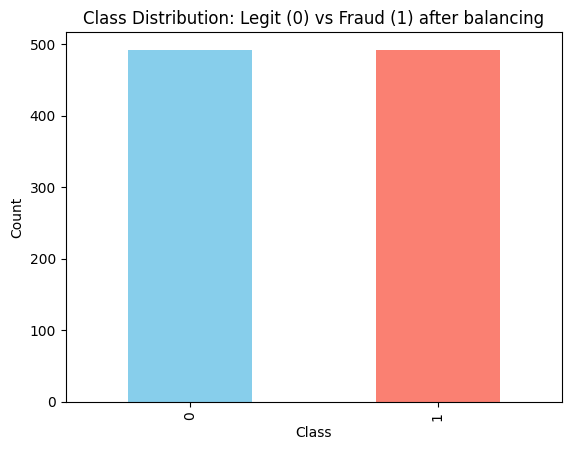

In [18]:
new_dataset['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Legit (0) vs Fraud (1) after balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
x=new_dataset.drop(columns='Class',axis=1)   #we drop class column axis=1 (columns)
y=new_dataset['Class']

In [27]:
x_train_resampled,x_test_resampled,y_train_resampled,y_test_resampled=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [28]:
print(x.shape,x_train_resampled.shape,x_test_resampled.shape)

(984, 30) (787, 30) (197, 30)


In [29]:
lr_model=LogisticRegression(max_iter=1000, random_state=42)

In [30]:
lr_model.fit(x_train_resampled,y_train_resampled)

C:\Users\varma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [31]:
#make prdiction
y_pred=lr_model.predict(x_test_resampled)

## Evaluate the model

In [33]:
print(confusion_matrix(y_test_resampled, y_pred))

[[97  2]
 [10 88]]


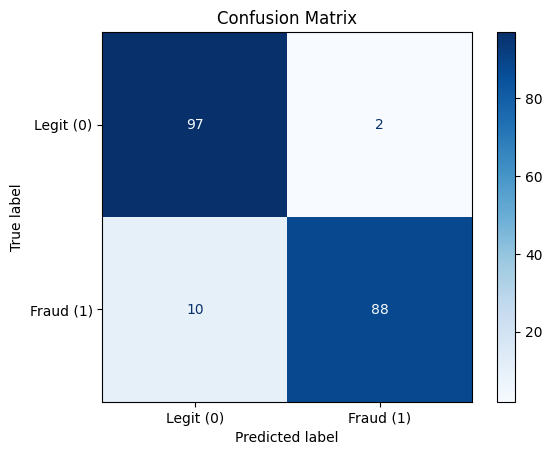

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



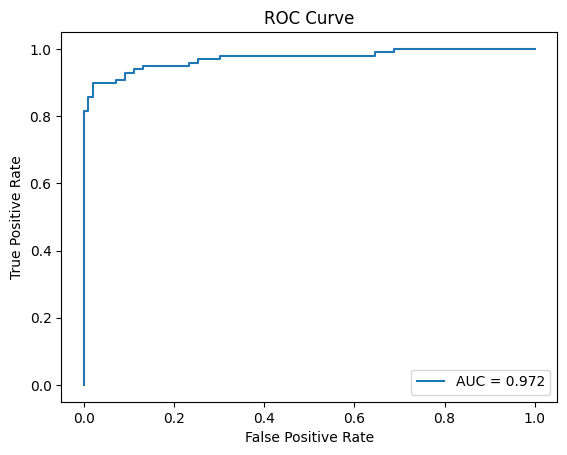

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = lr_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve shows how well the model separates fraud and non-fraud transactions across different thresholds. A higher AUC indicates better discrimination ability.

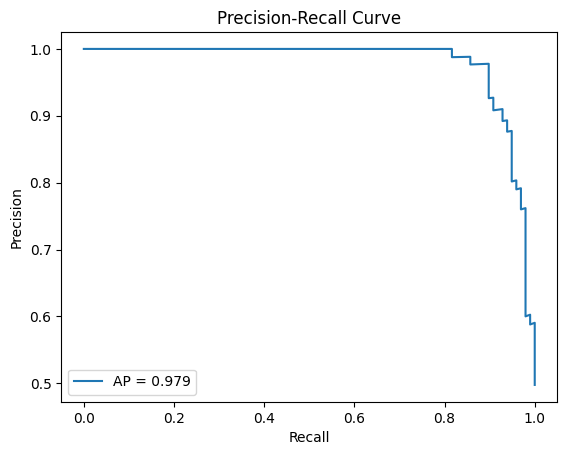

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
ap = average_precision_score(y_test, y_pred_prob)

plt.plot(recall, precision, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Although I evaluated both ROC and Precision–Recall curves, I prioritized the Precision–Recall curve because it better reflects minority class performance.

<h2 style="color:darkblue;">Final Model Evaluation Summary</h2>

<p style="color:green;"><b>Key Results:</b></p>

<ul>
  <li><b>Legitimate Transactions (Class 0):</b>
    <ul>
      <li>Precision: <span style="color:blue;">0.91</span></li>
      <li>Recall: <span style="color:blue;">0.98</span></li>
      <li>F1-score: <span style="color:blue;">0.94</span></li>
    </ul>
  </li>

  <li><b>Fraudulent Transactions (Class 1):</b>
    <ul>
      <li>Precision: <span style="color:blue;">0.98</span></li>
      <li>Recall: <span style="color:blue;">0.90</span></li>
      <li>F1-score: <span style="color:blue;">0.94</span></li>
    </ul>
  </li>
</ul>

<p style="color:darkred;"><b>Interpretation:</b></p>

<p>
The Logistic Regression model demonstrates strong performance in detecting fraudulent transactions.
A recall of <b>90%</b> for the fraud class indicates that most fraudulent cases are successfully identified,
while high precision ensures minimal false alarms.
</p>

<p style="color:purple;"><b>Conclusion:</b></p>

<p>
Given the highly imbalanced nature of credit card fraud data, evaluation focused on recall and F1-score
rather than accuracy. The results show that Logistic Regression, trained using undersampled data,
provides a reliable baseline model for fraud detection.
</p>
